## Sussidi e Misure per preservare l'ambiente

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.api as sm
import altair as alt
import json
import geopandas as gpd

## La situazione Europea

Il Green Deal Europeo ha come principale obiettivo la riduzione di CO2, la preservazione dell'ambiente e il tentativo di portare entro il 2050 i dati relativi al surriscaldamento entro range tollerabili e non irreversibili.
Guardiamo la situazione relativa all'impatto agricolo del 2021.

In [21]:
co2_data = pd.read_csv("Pesticidi/dati emissioni europa.csv")
europe = gpd.read_file("Pesticidi/custom.geo.json")
co2_data

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Source Code,Source,Unit,Value,Flag,Flag Description
0,GT,Emissions totals,2,Afghanistan,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,2342.51,E,Estimated value
1,GT,Emissions totals,3,Albania,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,943.90,E,Estimated value
2,GT,Emissions totals,4,Algeria,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,35309.89,E,Estimated value
3,GT,Emissions totals,5,American Samoa,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,133.68,E,Estimated value
4,GT,Emissions totals,6,Andorra,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,56.07,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,GT,Emissions totals,243,Wallis and Futuna Islands,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,2.22,E,Estimated value
230,GT,Emissions totals,205,Western Sahara,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,0.00,E,Estimated value
231,GT,Emissions totals,249,Yemen,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,2370.94,E,Estimated value
232,GT,Emissions totals,251,Zambia,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,34355.60,E,Estimated value


In [3]:
with open("Pesticidi/custom.geo.json", encoding="utf-8") as f:
    geojson_data = json.load(f)

country_names = [feature['properties']['name'] for feature in geojson_data['features']]
print(country_names)

['France', 'Ukraine', 'Belarus', 'Lithuania', 'Czechia', 'Germany', 'Estonia', 'Latvia', 'Norway', 'Sweden', 'Finland', 'Luxembourg', 'Belgium', 'North Macedonia', 'Albania', 'Kosovo', 'Spain', 'Denmark', 'Romania', 'Hungary', 'Slovakia', 'Poland', 'Ireland', 'United Kingdom', 'Greece', 'Austria', 'Italy', 'Switzerland', 'Netherlands', 'Liechtenstein', 'Serbia', 'Croatia', 'Slovenia', 'Bulgaria', 'San Marino', 'Monaco', 'Andorra', 'Montenegro', 'Bosnia and Herz.', 'Portugal', 'Moldova', 'Vatican', 'Iceland', 'Malta', 'Jersey', 'Guernsey', 'Isle of Man', 'Åland', 'Faeroe Is.']


In [4]:
for feature in geojson_data['features']:
    feature['properties']['Area'] = feature['properties'].pop('name')

with open("europe_modified.geojson", "w", encoding="utf-8") as f:
    json.dump(geojson_data, f, indent=4)

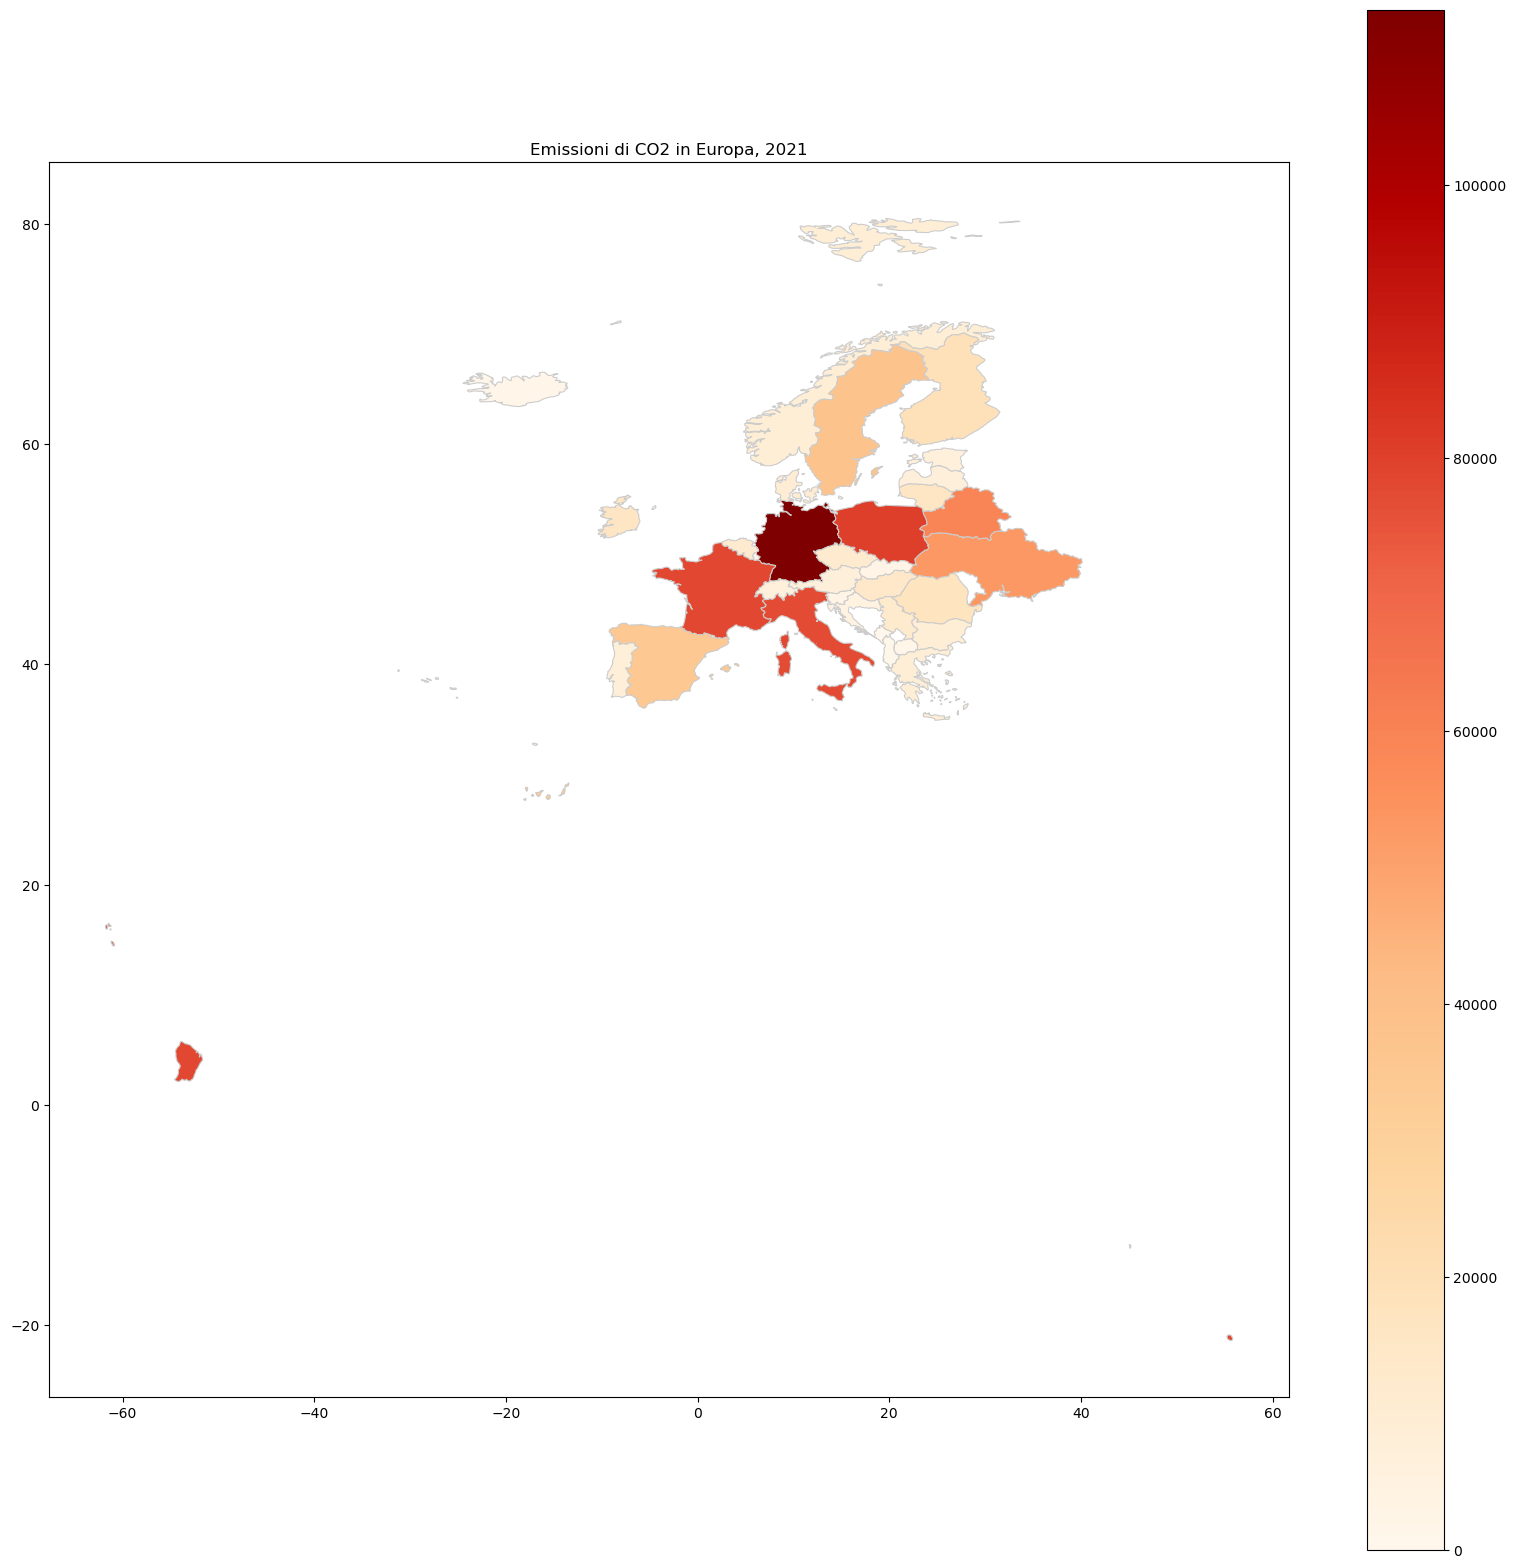

In [27]:
merged_data = europe.merge(co2_data, how="left", left_on="name", right_on="Area")

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
merged_data.plot(column="Value", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Emissioni di CO2 in Europa, 2021")
plt.show()

# c'è un pezzo di America Latina che il mio orrendo file ha riconosciuto come Francese, fuck colonialism fuck json

Tra gli impegni del Green Deal per ridurre i valori, vi sono numerose misure.

Il programma di sviluppo rurale (RDPs, suddivisi in nazionali e regionali) finanziato dall'Unione Europea è definito sul portale dati EU come <i> Lo sviluppo rurale è il "secondo pilastro" della politica agricola comune (PAC), che rafforza il "primo pilastro" del sostegno al reddito e delle misure di mercato favorendo la sostenibilità sociale, ambientale ed economica delle zone rurali. </i>
Gli sviluppi rurali nazionali confluiscono nel piano strategico nazionale della PAC. .

In [6]:
allocations = pd.read_csv("Planned-financial-allocations-under-the-CAP-Strategic-Plans-2023-27.csv")

In [7]:
chart = alt.Chart(allocations).mark_arc().encode(
    theta=alt.Theta(field="Allocation", type="quantitative"),
    color=alt.Color(field="Categoria", type="nominal"),
    tooltip=[alt.Tooltip("Categoria:N"), 
             alt.Tooltip("Allocation:Q", format=".4") 
            ]
)

display(chart)

alt.Chart(...)

In che modo viene ulteriormente suddivisa questa cifra?
Si legge:

##### 1. Almeno il 30% dei finanziamenti di ciascun PSR deve essere destinato a misure a tutela dell'ambiente o di contrasto ai cambiamenti climatici. Questi sono per lo più convogliati attraverso sovvenzioni e pagamenti annuali agli agricoltori che scelgono pratiche più rispettose dell'ambiente.

##### 2. Almeno il 5% dei finanziamenti dei PSR deve essere destinato ad azioni basate sull'approccio LEADER / sviluppo locale di tipo partecipativo.

In particolare,si legge nel Piano di Valutazione Strategico per la PAC (nel contesto italiano) il seguente elenco di obiettivi:
- competitività del settore agricolo, alimentare e forestale in ottica sostenibile;
- transizione ecologica del settore agricolo, alimentare e forestale;
- capacità di attivare conoscenza, ricerca e innovazioni;
- sviluppodell’economia rurale e rafforzamento della resilienza e della vitalità dei territori rurali;
- promozione del lavoro agricolo e forestale di qualità e la sicurezza sui posti di la
- capacità di diffondere forme di digitalizzazione nei sistemi agroalimentari e rurali.

Guardiamo ora ai pagamenti diretti in ambito italiano.
voro

In [8]:
pag_dir = pd.read_csv("itapac.csv")

In [9]:
chart = alt.Chart(pag_dir).mark_bar().encode(
    x=alt.X("Program:N", title="Program"),  
    y=alt.Y("Amount:Q", title="Amount"),    
    color=alt.Color("Program:N"),           
    tooltip=[alt.Tooltip("Program:N"),      
             alt.Tooltip("Amount:Q")        
            ]
).properties(
    width=600,  
    height=400   
)

display(chart)

alt.Chart(...)

Sempre sul portale dati EU, leggiamo <i> Il sostegno di base al reddito per la sostenibilità è un pagamento disaccoppiato annuale basato sulla superficie finanziato esclusivamente dal bilancio dell'UE e continua a essere lo strumento più importante della PAC per sostenere il reddito degli agricoltori dell'UE. </i>

Possiamo vedere citato nel documento finale del Piano Strategico 2023-2027 le risorse per il BISS, ovvero il Basic income support for sustainability, che andrebbe a coprire i costi della transizione ecologica statale. 
Segue precise metriche, quali la tipologia di suoli, colture, tecniche agroalimentari e le condizioni economiche in cui verte il paese. L'Italia riceve una percentuale sotto la media europea.

![Distribuzione della BISS](BIS_allocation.png)


##### Ovviamente risulta complicato comprendere il motivo alla luce di molteplici fattori che influenzano la scelta, ma dal momento che l'Italia risulta appunto aver sempre sfruttato relativamente poco i finanziamenti europei, i fondi saranno stati spartiti tenendo conto della concreta utilità. 
Qui torna il tema della difficoltà italiana a spendere gli aiuti economici dell'Unione Europea. Nell’ultimo bollettino di monitoraggio del Ministero dell'Economia e delle Finanze, risultava un avanzamento del 72,95% in termini di impegni e del 72,95% in termini di pagamenti per le risorse Feasr del periodo 2014-2020.
Secondo Alberto Mantino, presidente dell’Associazione italiana di agroforestazione, la partecipazione ai bandi regionali risulta macchinosa e complessa a causa della loro mole burocratica e della difficoltà di tradurre in azioni finanziabili alcune delle necessità degli agricoltori.

## Ma di cosa parliamo quando parliamo di sussidi?

Su PagellaPolitica leggiamo, in un articolo di febbraio 2024: <i> [...] questa categoria rientrano infatti incentivi, agevolazioni, finanziamenti agevolati ed esenzioni da tributi. I sussidi si dividono in due categorie: quelli diretti, che per esempio prevedono trasferimenti di risorse direttamente ai produttori, e quelli indiretti, che contengono sconti fiscali e altre agevolazioni. </i>

Nel catalogo della Quinta Edizione dei Sussidi ambientali (2021), compaiono diverse voci:

In [10]:
suss_amb = pd.read_csv("sussidiambi.csv")
suss_amb

,Codice,Nome,Mld €,FFS,Livello di riformabilità
0,EN.SI.24,Differente trattamento fiscale fra benzina e g...,3.4,FFS,Nazionale
1,IVA.01,IVA agevolata per la cessione di case di abita...,2.6,NaN,Nazionale
2,EN.SD.01,Rilascio delle quote assegnate a titolo gratuito,2.4,FFS,Europeo
3,IVA.13,IVA agevolata per case di abitazione non di lusso,2.3,NaN,Nazionale
4,IVA.07,IVA agevolata per l’energia elettrica per uso ...,1.8,FFS,Nazionale
5,AL.SI.02,Credito d’imposta per beni strumentali - Mezzo...,1.7,NaN,Nazionale
6,EN.SI.19,Rimborso del maggior onere dall’aumento dell’a...,1.4,FFS,Nazionale
7,TR.SI.04,Agevolazioni fiscali sui fringe benefit,1.2,FFS,Nazionale
8,EN.SI.21,Impiego dei prodotti energetici nei lavori agr...,0.9,FFS,Nazionale
9,EN.SI.04,Esenzione dall’accisa sui carburanti per la na...,0.9,FFS,Internazionale/Nazionale


In [11]:
chart = alt.Chart(suss_amb).mark_bar().encode(
    x=alt.X("Nome:N", title="Nome"),  
    y=alt.Y("Mld €:Q", title="Mld €"),    
    color=alt.Color("Nome:N"),           
    tooltip=[alt.Tooltip("Nome:N"),      
             alt.Tooltip("Mld €:Q")        
            ]
).properties(
    width=600,  
    height=400   
)

display(chart)

alt.Chart(...)

I sussidi di cui sopra includono la possibilità di poter usufruite di aiuti economici con carburante, pesticidi, e smaltimento rifiuti. Questo genere di SAD, ovvero <b> sussidi ambientali dannosi </b>, affiancati ai SAI ("sussidi ambientali incerti"). 

## Sussidi ambientali dannosi
#### Fertilizzanti

In Italia, l'ISPRA (Istituto Superiore per la Protezione e la Ricerca Ambientale) monitora la situazione legata all'uso di pesticidi, e il quadro fornito fino al 2021 è il seguente:

In [12]:
fertilizzanti = pd.read_csv("Pesticidi/tipo fert.csv")
fertilizzanti = fertilizzanti.melt(id_vars=['Tipo di fertilizzante'], var_name='Year', value_name='Tonnellate')

In [13]:
chart = alt.Chart(fertilizzanti, width=700, height=500).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='Year:O',
    y='Tonnellate:Q', 
    color='Tipo di fertilizzante:N'
)

display(chart)

alt.Chart(...)

I fertilizzanti sintetici, i cui precessi di produzione e trasporto causano emissioni di carbonio, e il loro uso in agricoltura provoca il rilascio di protossido di azoto, costituiscono il 

In [14]:
tot_fert = pd.read_csv("Pesticidi/tot fert.csv")

In [15]:
tot_fert = pd.DataFrame({
    'Year': ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    'FERTILIZZANTI CHIMICI': [6086, 6241, 5352, 4764, 4686, 5232, 5563, 5472, 5087, 5576, 5615],
    'FERTILIZZANTI ORGANICI': [3311, 3174, 3330, 3342, 3195, 3636, 3785, 3674, 3875, 3994, 3833]
})

# Creazione del grafico utilizzando Altair
chart = alt.Chart(tot_fert).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='Year:O',
    y=alt.Y('FERTILIZZANTI CHIMICI:Q', axis=alt.Axis(title='Tonnellate')),  # Asse y con etichetta "Tonnellate"
    color=alt.Color('Fertilizzanti:N', scale=alt.Scale(domain=['FERTILIZZANTI CHIMICI', 'FERTILIZZANTI ORGANICI'], range=['blue', 'green']), legend=alt.Legend(title=None)),  # Colore e legenda per i fertilizzanti
).properties(
    width=700,
    height=500
).transform_fold(
    fold=['FERTILIZZANTI CHIMICI', 'FERTILIZZANTI ORGANICI'],  # Unisci le due colonne in una singola colonna "Fertilizzanti"
    as_=['Fertilizzanti', 'Tonnellate']  # Rinomina le colonne unite
)

display(chart)

alt.Chart(...)

I fertilizzanti hanno garantito un aumento della produttività, della resistenza e maggiore sviluppo del settore agricolo. Ma, ovviamente, i danni ambientali non sono ignorabili. Nel paper <i>Greenhouse gas emissions from global production and use of nitrogen synthetic fertilisers in agriculture</i> (2022), una collaborazione tra Green Peace, Università di Torino e University of Exeter, venogno sottolineati i numeri delle emissioni di gas serra. 
Analizziamo, utlizzando gli stessi fati FAO adottati per condurre uno studio su macro-scala, la situazione italiana. 

In [16]:
emissioni_fert = pd.read_csv("Pesticidi/emissioni_fert.csv")
emissioni_fert

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,380,Italy,7234,Direct emissions (N2O),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,9.5109,E,Estimated value,NaN
1,GT,Emissions totals,380,Italy,7236,Indirect emissions (N2O),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,3.0910,E,Estimated value,NaN
2,GT,Emissions totals,380,Italy,7230,Emissions (N2O),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,12.6019,E,Estimated value,NaN
3,GT,Emissions totals,380,Italy,724313,Emissions (CO2eq) from N2O (AR5),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,3339.5035,E,Estimated value,NaN
4,GT,Emissions totals,380,Italy,723113,Emissions (CO2eq) (AR5),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,3339.5035,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,GT,Emissions totals,380,Italy,723113,Emissions (CO2eq) (AR5),6504,Fertilizers Manufacturing,2020,2020,3050,FAO TIER 1,kt,1531.7306,E,Estimated value,NaN
59,GT,Emissions totals,380,Italy,7230,Emissions (N2O),6504,Fertilizers Manufacturing,2021,2021,3050,FAO TIER 1,kt,0.2101,E,Estimated value,NaN
60,GT,Emissions totals,380,Italy,7273,Emissions (CO2),6504,Fertilizers Manufacturing,2021,2021,3050,FAO TIER 1,kt,1530.4379,E,Estimated value,NaN
61,GT,Emissions totals,380,Italy,724313,Emissions (CO2eq) from N2O (AR5),6504,Fertilizers Manufacturing,2021,2021,3050,FAO TIER 1,kt,55.6866,E,Estimated value,NaN


In [17]:
emissioni_fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       63 non-null     object 
 1   Domain            63 non-null     object 
 2   Area Code (M49)   63 non-null     int64  
 3   Area              63 non-null     object 
 4   Element Code      63 non-null     int64  
 5   Element           63 non-null     object 
 6   Item Code         63 non-null     int64  
 7   Item              63 non-null     object 
 8   Year Code         63 non-null     int64  
 9   Year              63 non-null     int64  
 10  Source Code       63 non-null     int64  
 11  Source            63 non-null     object 
 12  Unit              63 non-null     object 
 13  Value             63 non-null     float64
 14  Flag              63 non-null     object 
 15  Flag Description  63 non-null     object 
 16  Note              0 non-null      float64
dtyp

In [18]:
emissioni_fert.nunique()

Domain Code          1
Domain               1
Area Code (M49)      1
Area                 1
Element Code         6
Element              6
Item Code            2
Item                 2
Year Code            7
Year                 7
Source Code          1
Source               1
Unit                 1
Value               56
Flag                 1
Flag Description     1
Note                 0
dtype: int64

In [19]:
emissioni_fert = emissioni_fert.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Item Code', 'Item', 'Source Code', 'Source', 'Unit', 'Flag', 'Flag Description', 'Note', 'Year Code'],axis=1)
emissioni_fert

,Element Code,Element,Year,Value
0,7234,Direct emissions (N2O),2015,9.5109
1,7236,Indirect emissions (N2O),2015,3.0910
2,7230,Emissions (N2O),2015,12.6019
3,724313,Emissions (CO2eq) from N2O (AR5),2015,3339.5035
4,723113,Emissions (CO2eq) (AR5),2015,3339.5035
...,...,...,...,...
58,723113,Emissions (CO2eq) (AR5),2020,1531.7306
59,7230,Emissions (N2O),2021,0.2101
60,7273,Emissions (CO2),2021,1530.4379
61,724313,Emissions (CO2eq) from N2O (AR5),2021,55.6866


In [28]:
chart = alt.Chart(emissioni_fert).mark_line().encode(
    x='Year:O',  
    y='Value:Q',  
    color='Element:N'  
).properties(
    width=600,
    height=400
)

chart

### COS'È QUESTA MERDA

alt.Chart(...)

#### Pesticidi

Un'altro protagonista importande dell'impatto ambientale delle politiche agricole italiane sono i <b>pesticidi</b>.

La commissione Europea ha decretato precisi obblighi da rispettare per ripristinare condizioni ambientali estremamente danneggiate, dalle terre agricole ai mari, dalle foreste agli ambienti urbani. Infatti, essa propone di ridurre del 50% l'uso e il rischio dei pesticidi chimici entro il 2030. 

Tra le gravi implicazioni dell'uso di tonnellate di pesticidi, si richimano infatti spesso la biodiversità a rischio e la concentrazione di pesticidi trovate negli alimenti. 

L'obiettivo è riparare l'80% degli habitat europei in cattive condizioni. L'obiettivo è coprire almeno il 20% delle terre e delle aree marine dell'UE entro il 2030 con misure di ripristino della natura, ed estendere eventualmente queste misure a tutti gli ecosistemi che necessitano di ripristino entro il 2050.

Agricoltori, boscaioli e pescatori sono dunque invitati a riconsiderare l'uso di pesticidi dannosi e altri prodotti potenzialmente pericolosi per il benessere di fauna e flora.  Per questo, regole robuste per ridurre l'uso dei pesticidi chimici e garantire sistemi alimentari più sostenibili entro il 2030 sono state applicate a partire dalla votazione favorevole del nuovo Piano.

Nuove regole riguardanti il controllo dei parassiti rispettoso dell'ambiente: Nuove misure garantiranno che tutti gli agricoltori e gli altri utilizzatori professionali dei pesticidi praticino la Gestione Integrata dei Parassiti (IPM), in cui vengono considerati per primi metodi alternativi rispettosi dell'ambiente per la prevenzione e il controllo dei parassiti, prima che i pesticidi chimici possano essere utilizzati come ultima risorsa. Le misure includono anche la registrazione obbligatoria per gli agricoltori e altri utilizzatori professionali. Inoltre, gli Stati membri devono stabilire regole specifiche per le colture identificando le alternative da utilizzare invece dei pesticidi chimici.
Un divieto su tutti i pesticidi in aree sensibili.

###### Fonti: https://ec.europa.eu/commission/presscorner/detail/en/ip_22_3746

### Situazione italiana

![...](Pesticidi/itali_ausp.jpg)
![...](Pesticidi/itali_ausp2.jpg)



###### Fonte: https://food.ec.europa.eu/plants/pesticides/sustainable-use-pesticides/farm-fork-targets-progress/member-states-trends_en#Italy

Nel 2019 le concentrazioni misurate di pesticidi hanno superato i limiti previsti dalle normative nel 25% dei siti di monitoraggio per le acque superficiali e nel 5% di quelli per
le acque sotterranee. La contaminazione rilevata è ancora sottostimata, a causa delle
difficoltà tecniche e metodologiche, anche se negli anni l’efficacia del monitoraggio sta
migliorando in relazione alla copertura territoriale, al numero di campioni analizzati e alle
sostanze cercate.
Un forte impulso a transitare verso un’agricoltura più sostenibile è impartito da due strategie chiave nell’ambito del Green Deal europeo: “Biodiversità 2030” e “Dal produttore al
consumatore” (Farm to fork). Quest’ultima prevede la riduzione dell’uso dei pesticidi del
50% entro il 2030.


###### Fonte: https://www.isprambiente.gov.it/files2021/pubblicazioni/pubblicazioni-di-pregio/tea.pdf

### Conclusioni

L'Italia è dunque un paese il cui impatto ambientale non è ignorabile, e i piani europei per rientrarei all'interno di parametri più sostenibili non possono essere messi in secondo piano.
Eppure, l'"estremismo ecologista" di cui parlano gli agricoltori nel loro comunicato sembra rappresentare un problema maggiore, nel breve -  ma anche nel lungo - termine. 
Vediamo allora che tipo di soluzioni sta adottando l'Italia per bilanciare la situazione, per trovare il miglior compromesso tra politiche agricole sostenibili e una corretta transizione ecologica per le tasche degli agricoltori.